# Data Compression - Dimensionality Reduction - SkLearn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_wine = pd.read_csv('/Users/tkmacl9/Desktop/Patents_Research_Papers_Personalization/All_Machine_Learning/wine_UCI.csv', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

### Doing the Steps in a PCA from scratch --

1. Transform the Data to StandardScaler - Mean 0
2. Find the Covariance Matrix
3. Find the Eigen Values and Eigen Vectors of the Covariance Matrix
4. Select K eigen vectors corresponding to the k largest eigen values
5. Costruct a k project matrix W from the top k eigen vectors
6. Using the Projection Matrix W , transform the Training and the test data to obtain the k-dimensional feature subspace

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [53]:
# Find the Covariance matrix which is a 13 X 13 matrix, between the fatures of the wine data set
# We then find the set of the Eigen values and the eigen vectors from the Covariance Matrix
# using the linear algebra package in sklearn numpy
cov_mat = np.cov(X_test_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print "Eigen Values  \n %s \n" % eigen_values
print "Eigen Vectors  \n %s \n" % eigen_vectors

Eigen Values  
 [ 4.5587553   2.65338926  1.33002158  1.12549719  0.7955333   0.55208871
  0.43040117  0.25178108  0.21781015  0.17581265  0.15631419  0.11659798
  0.1073023 ] 

Eigen Vectors  
 [[ 0.16886997 -0.467317    0.4016489  -0.08694502 -0.01138094 -0.41180617
   0.12496363  0.30108147  0.31739672 -0.35361088 -0.26417715 -0.11252234
  -0.00211917]
 [-0.21261403 -0.19813765  0.08483604  0.41235989 -0.57891822 -0.29726441
  -0.26161843 -0.16286142  0.19537765  0.31703974  0.16626559  0.07669211
  -0.21818773]
 [ 0.10688017 -0.32699677 -0.6238769  -0.00553525 -0.24003186 -0.01122774
   0.24784658 -0.12364948  0.07155087  0.00952197 -0.37346795  0.34858183
   0.30288686]
 [-0.11959163 -0.0649219  -0.43893358  0.32258864  0.08513528 -0.06861996
   0.36011143 -0.03721172  0.07325493 -0.40841489  0.29944635 -0.38917874
  -0.35838246]
 [ 0.20917585 -0.34175904 -0.16896007 -0.08457399 -0.21048389  0.50593302
  -0.26588456  0.49499492  0.13305666  0.08885728  0.30934111 -0.23764862
   0.

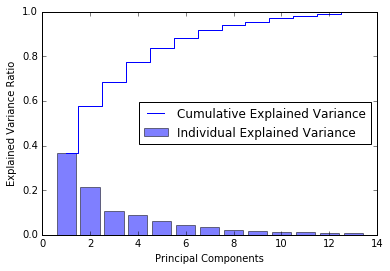

In [55]:
# Plot the values of Eigen Values and the Cumulative sum of the Eigen Values in a plot
import matplotlib.pyplot as plt
%matplotlib inline
total = sum(eigen_values)
var_exp = [(i/total) for i in sorted(eigen_values, reverse=True)]
# print eigen_values_perc
cum_var_exp = np.cumsum(eigen_values_perc)
# print eigen_values_cum_sum
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,14), cum_var_exp, where='mid', label="Cumulative Explained Variance")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [49]:
?plt.step